## Apex Legends Status DGS

In [29]:
## Imports

import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Getting list of games

In [6]:
## Get commands

url = "https://apexlegendsstatus.com/tournament/ingram/"


# tournamentID: for getScores, specify the game you are querying for
PARAMS = {"qt": "getTournaments",
          "allGames": 1}

## Put your DGS account token here
HEADERS = {'Authorization': "<Your Token Goes Here>"}


In [7]:
## Making the request

# qt: query type for DGS, getTournaments, getScores, getGames
#allGames = 0: show your games only
#allGames = 1: show games recently uploaded
PARAMS = {"qt": "getTournaments",
          "allGames": 1}

r = requests.get(url = url, params = PARAMS, headers = HEADERS)

In [10]:
data = r.json()

data

[{'id': 1373, 'name': 'Stemel Test', 'privacyMode': 'SCRIM', 'games': []},
 {'id': 1372, 'name': 'aaaa', 'privacyMode': 'SCRIM', 'games': []},
 {'id': 1371,
  'name': 'scrims beta',
  'privacyMode': 'SCRIM',
  'games': [{'id': '5a079eb20710b4c9ab5a22d61ddd39e1',
    'title': 'Game #1',
    'map': "World's Edge (Season 17)",
    'uploadedAtUnixTimestamp': 1690974017},
   {'id': '4f21910604cd2de5a5c488282724532c',
    'title': 'Game #2',
    'map': "World's Edge (Season 17)",
    'uploadedAtUnixTimestamp': 1690975645},
   {'id': '5d18cce6d17d66e585f45d9142e9858c',
    'title': 'Game #3',
    'map': 'Storm Point (Season 13)',
    'uploadedAtUnixTimestamp': 1690978994},
   {'id': '8261002325f6b9f75d8488db878a9a79',
    'title': 'Game #4',
    'map': "World's Edge (Season 17)",
    'uploadedAtUnixTimestamp': 1690979154},
   {'id': '465b3387ace8dfd0865618ea2a5a436a',
    'title': 'Game #5',
    'map': 'Storm Point (Season 13)',
    'uploadedAtUnixTimestamp': 1690980566},
   {'id': 'ce9c35550

#### Querying data for a single game

In [14]:
## Making the request

# Place the tournament Id here
PARAMS = {"qt": "getScores",
          "tournamentId": 1361}

r = requests.get(url = url, params = PARAMS, headers = HEADERS)

In [15]:
data = r.json()

data

{'ALSData': {'tournamentId': '1361',
  'name': 'ApexRu Scrims week 14',
  'lastDataUpdate': 1690995904},
 'gamesData': {'totalPlayed': 6},
 'gamesPlayed': ['5d5937d8b64080887f990b4fc41a508e',
  '1289a048adee81aadbe971411b8339d6',
  '1d6ccf704647f92a2ac062cfd36ae293',
  'c710683be635073c1e744cddb1753eee',
  '75ec739af7636d4945a1858bb9d3fbfd',
  'dbe41747539c84dd12caf3557804aeaf'],
 'gamesCancelled': [],
 'teamData': [{'teamName': 'Team 2',
   'points': 140,
   'knockdownAssists': 9,
   'ringDamage': 0,
   'deaths': 13,
   'damageTaken': 20997,
   'damageDealt': 25160,
   'assists': 81,
   'kills': 82,
   'revivesGiven': 10,
   'knockdowns': 86,
   'ranking': [1, 2, 1, 1, 15, 1],
   'respawnsGiven': 1,
   'playersData': [{'playerName': 'продавец хуйни',
     'kills': 31,
     'deaths': 4,
     'damageDealt': 9338,
     'damageTaken': 7681,
     'ringDamage': 0,
     'assists': 25,
     'revivesGiven': 1,
     'gamesPlayed': 6},
    {'playerName': 'Хинкалька',
     'kills': 24,
     'deat

In [18]:
data["teamData"]

[{'teamName': 'Team 2',
  'points': 140,
  'knockdownAssists': 9,
  'ringDamage': 0,
  'deaths': 13,
  'damageTaken': 20997,
  'damageDealt': 25160,
  'assists': 81,
  'kills': 82,
  'revivesGiven': 10,
  'knockdowns': 86,
  'ranking': [1, 2, 1, 1, 15, 1],
  'respawnsGiven': 1,
  'playersData': [{'playerName': 'продавец хуйни',
    'kills': 31,
    'deaths': 4,
    'damageDealt': 9338,
    'damageTaken': 7681,
    'ringDamage': 0,
    'assists': 25,
    'revivesGiven': 1,
    'gamesPlayed': 6},
   {'playerName': 'Хинкалька',
    'kills': 24,
    'deaths': 7,
    'damageDealt': 7525,
    'damageTaken': 7530,
    'ringDamage': 0,
    'assists': 29,
    'revivesGiven': 2,
    'gamesPlayed': 6},
   {'playerName': 'EBALOMESHALO4KA',
    'kills': 27,
    'deaths': 2,
    'damageDealt': 8297,
    'damageTaken': 5786,
    'ringDamage': 0,
    'assists': 27,
    'revivesGiven': 7,
    'gamesPlayed': 6}]},
 {'teamName': 'Team 11',
  'points': 66,
  'deaths': 16,
  'ringDamage': 0,
  'damageTaken

In [25]:
teams = data["teamData"] # Just a shortcut

teamKPRatio = []

gameCount = len(data["gamesPlayed"])

for t in teams:
    killsPerGame = t["kills"]/gameCount
    placementsPerGame = (t["points"] - killsPerGame)/gameCount
    teamName = t["teamName"]
    teamKPRatio.append((killsPerGame, placementsPerGame, teamName))

teamKPRatio
    

[(13.666666666666666, 21.055555555555554, 'Team 2'),
 (5.5, 10.083333333333334, 'Team 11'),
 (6.833333333333333, 9.527777777777777, 'Team 10'),
 (3.5, 8.083333333333334, 'Team 8'),
 (3.0, 5.833333333333333, 'Team 12'),
 (3.0, 5.666666666666667, 'Team 19'),
 (0.8333333333333334, 5.027777777777778, 'Team 14'),
 (3.0, 4.5, 'Team 9'),
 (1.5, 4.583333333333333, 'Team 4'),
 (1.8333333333333333, 4.027777777777778, 'Team 7'),
 (2.5, 3.5833333333333335, 'Team 17'),
 (1.5, 3.25, 'Team 15'),
 (1.6666666666666667, 2.888888888888889, 'Team 16'),
 (1.6666666666666667, 2.722222222222222, 'Team 1'),
 (2.1666666666666665, 2.4722222222222223, 'Team 20'),
 (1.6666666666666667, 2.388888888888889, 'Team 13'),
 (1.3333333333333333, 1.9444444444444444, 'Team 6'),
 (0.8333333333333334, 2.0277777777777777, 'Team 18'),
 (0.6666666666666666, 1.222222222222222, 'Team 5'),
 (0.8333333333333334, 1.027777777777778, 'Team 3')]

#### Plotting a KP per game/ PP per game graph

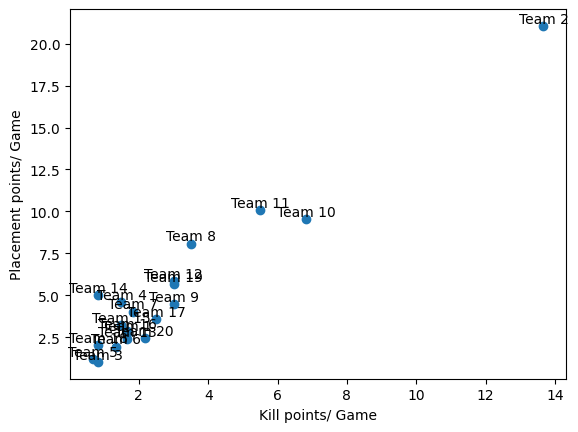

In [28]:
# Plotting the graph:
tkp2 = list(zip(*teamKPRatio))
plt.scatter(tkp2[0],tkp2[1])

plt.xlabel("Kill points/ Game")
plt.ylabel("Placement points/ Game")




for t in teamKPRatio:
    plt.text(t[0], t[1], t[2], va='bottom', ha='center')
    


plt.show()

Normally, should not look that bad (In this tournament there happens to be an outlier)

Also, I am not using SD because there is no per game stats yet, the analyst of [this post](https://www.reddit.com/r/CompetitiveApex/comments/10nmlx0/analysis_breaking_down_the_algs_playoffs_a/) should have collected all game samples across game days to create a sample, which does not make sense in this context (random one off tournament, chosen just for demonstration purposes)


#### Distribution of Damage/Game (Playerwise)


In [30]:
dpgList = []

teams = data["teamData"] 

for t in teams:
    for p in t["playersData"]:
        dmg = p["damageDealt"]
        gamesPlayed = p["gamesPlayed"]
        dpgList.append(dmg/gamesPlayed)

dpgList

[1556.3333333333333,
 1254.1666666666667,
 1382.8333333333333,
 706.6666666666666,
 1064.6666666666667,
 658.3333333333334,
 835.6666666666666,
 1058.8333333333333,
 757.0,
 806.0,
 723.0,
 1105.3333333333333,
 587.5,
 641.6666666666666,
 482.0,
 644.5,
 650.5,
 583.3333333333334,
 159.66666666666666,
 523.3333333333334,
 383.6666666666667,
 695.6666666666666,
 360.3333333333333,
 393.5,
 449.0,
 522.0,
 154.75,
 632.5,
 282.1666666666667,
 194.5,
 1703.0,
 321.8333333333333,
 229.5,
 154.5,
 619.3333333333334,
 442.6666666666667,
 389.0,
 527.5,
 562.1666666666666,
 500.8333333333333,
 190.0,
 243.16666666666666,
 667.8333333333334,
 297.5,
 261.8333333333333,
 494.2,
 220.33333333333334,
 281.6,
 156.33333333333334,
 471.8333333333333,
 208.0,
 272.8333333333333,
 203.33333333333334,
 359.5,
 418.1666666666667,
 241.33333333333334,
 488.2,
 391.2,
 100.33333333333333,
 140.83333333333334,
 198.33333333333334]

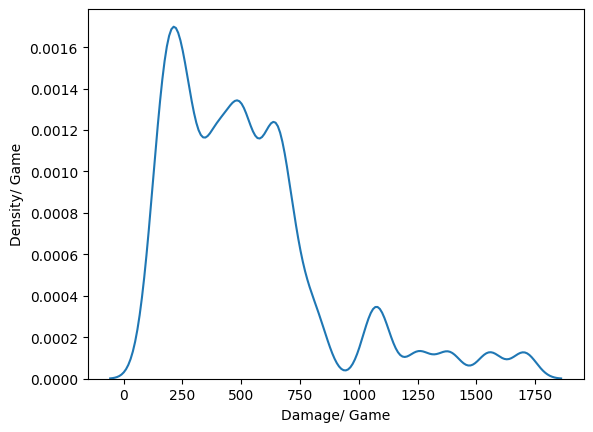

In [39]:
#Creating the KDE plot

fig = sns.kdeplot(np.array(dpgList), bw_method = 0.15)
plt.xlabel("Damage/ Game")
plt.ylabel("Density/ Game")
plt.show(fig)
